## Color segmentation. 
Reduce the number of color in the image.

In [5]:
FIGURES_ROOT = './figures'

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [40]:
kmeans = KMeans(n_clusters=15)

In [41]:
filenames = os.listdir(FIGURES_ROOT)
filename = filenames[0]
img_path = os.path.join(FIGURES_ROOT, filename)

In [42]:
img = mpimg.imread(img_path)

In [43]:
kmeans.fit(img.reshape(-1, 3))

KMeans(n_clusters=15)

In [44]:
new_img = list(map(lambda x : kmeans.cluster_centers_[x], kmeans.labels_))
new_img = np.array(new_img).astype('uint8').reshape(img.shape)

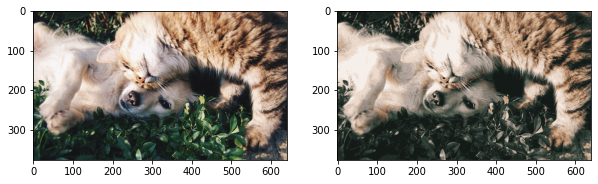

In [45]:
figure = plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(new_img)

## Semi supervised learning  
Try using the clustering to increase the performance of the model.

In [73]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
X, y = fetch_openml(name='mnist_784', version = 1, return_X_y=True)

In [93]:
Xtrain, Xtest = X[:2000], X[2000:]
ytrain, ytest = y[:2000], y[2000:]

In [94]:
lin_clf = LogisticRegression()
scaler = MinMaxScaler()

In [95]:
# try using lin_clf directly
lin_clf.fit(scaler.fit_transform(Xtrain), ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [96]:
lin_clf.score(scaler.transform(Xtest), ytest)

0.8736617647058823

### Preprocess the data using KMeans first

In [97]:
from sklearn.pipeline import Pipeline
n_clusters = 50
kmeans = KMeans(n_clusters=50)

In [98]:
Xtrain_kmean = kmeans.fit_transform(scaler.fit_transform(Xtrain))

In [99]:
new_lin_clf = LogisticRegression()
new_lin_clf.fit(Xtrain_kmean, ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [100]:
new_lin_clf.score(kmeans.transform(scaler.transform(Xtest)), ytest)

0.8507058823529412

In [101]:
pipe = Pipeline([
    ('sclaer', MinMaxScaler()),
    ('kmeans', KMeans(n_clusters = 50)),
    ('predictor', LogisticRegression())
])

In [102]:
from scipy.stats import uniform, randint

params_dist = {'kmeans__n_clusters':randint(1, 784)}
rdcv = RandomizedSearchCV(pipe, params_dist)

In [103]:
rdcv.fit(Xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

RandomizedSearchCV(estimator=Pipeline(steps=[('sclaer', MinMaxScaler()),
                                             ('kmeans', KMeans(n_clusters=50)),
                                             ('predictor',
                                              LogisticRegression())]),
                   param_distributions={'kmeans__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6621e6510>})

In [105]:
rdcv.best_estimator_.score(Xtest, ytest)

0.8523235294117647

In [106]:
rdcv.best_params_

{'kmeans__n_clusters': 110}

In [111]:
import pickle
import joblib
import os

os.makedirs('./saved_model/ch9-unsupervised-learning', exist_ok = True)

In [113]:
with open('./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf-2', 'wb') as f:
    rdcv_serial = pickle.dumps(rdcv)
    f.write(rdcv_serial)

In [110]:
open('./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf')

FileNotFoundError: [Errno 2] No such file or directory: './saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf'

In [112]:
joblib.dump(rdcv, './saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf')

['./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf']

In [115]:
!du -h ./saved_model/ch9-unsupervised-learning/*

732K	./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf
732K	./saved_model/ch9-unsupervised-learning/randomcv-kmeans-log-clf-2
